# The NDDataset object

The NDDataset is the main object use by **SpectroChemPy**.

Like numpy ndarrays, NDDataset have the capability to be sliced, sorted and subject to matematical operations.

But, in addition, NDDataset may have units, can be masked and each dimensions can have coordinates also with units.
This make NDDataset aware of unit compatibility, *e.g.*, for binary operation such as addtions or subtraction or
during the application of mathematical operations. In addition or in replacement of numerical data for coordinates,
NDDatset can also have labeled coordinates where labels can be different kind of objects (strings, datetime,
numpy nd.ndarray or othe NDDatasets, etc...).

This offers a lot of flexibility in using NDDatasets that,  we hope, will be useful for applications.
See the **Tutorials** for more information about such possible applications.

**Below (and in the next sections), we try to give an almost complete view of the NDDataset features.**

In [1]:
import spectrochempy as scp

"<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAABgAAAAYCAYAAADgdz34AAAAAXNSR0IArs4c6QAAAAlw SFlzAAAJOgAACToB8GSSSgAAAetpVFh0WE1MOmNvbS5hZG9iZS54bXAAAAAAADx4OnhtcG1ldGEgeG1sbnM6eD0iYWRvYmU6bnM6 bWV0YS8iIHg6eG1wdGs9IlhNUCBDb3JlIDUuNC4wIj4KICAgPHJkZjpSREYgeG1sbnM6cmRmPSJodHRwOi8vd3d3LnczLm9yZy8x OTk5LzAyLzIyLXJkZi1zeW50YXgtbnMjIj4KICAgICAgPHJkZjpEZXNjcmlwdGlvbiByZGY6YWJvdXQ9IiIKICAgICAgICAgICAg eG1sbnM6eG1wPSJodHRwOi8vbnMuYWRvYmUuY29tL3hhcC8xLjAvIgogICAgICAgICAgICB4bWxuczp0aWZmPSJodHRwOi8vbnMu YWRvYmUuY29tL3RpZmYvMS4wLyI+CiAgICAgICAgIDx4bXA6Q3JlYXRvclRvb2w+bWF0cGxvdGxpYiB2ZXJzaW9uIDIuMS4wLCBo dHRwOi8vbWF0cGxvdGxpYi5vcmcvPC94bXA6Q3JlYXRvclRvb2w+CiAgICAgICAgIDx0aWZmOk9yaWVudGF0aW9uPjE8L3RpZmY6 T3JpZW50YXRpb24+CiAgICAgIDwvcmRmOkRlc2NyaXB0aW9uPgogICA8L3JkZjpSREY+CjwveDp4bXBtZXRhPgqNQaNYAAAGiUlE QVRIDY1We4xU1Rn/3XPuYx47u8w+hnU38hTcuoUEt/6D2y4RB0ME1BoEd9taJaKh9CFiN7YGp7appUAMNmktMZFoJTYVLVQ0smsy 26CN0SU1QgsuFAaW3WVmx33N677O6XfuyoIxTXqSO/fec+75fd93vt/3/UbDV0aKSZmCpkFMLz3T9utuu2N+o98aDSMBKVAo89z5 y+zEz3ZafcCOfvWdlGCalqKn1Bf71CygTd+mf1esSOnpdMpTb+vWpTZuWVfe3jLPa5tzHYNm0T5N0gpdkkHaDBeGBU6d1/t/fyS8 +/CbqdfUvmsx1PuMgc2bNxv79u1zgd31r+7JH1jbIZKxWRXAcYUQ8IWvBfBXNjEuJWPgMA02NR7C3/pYT9fjdZ3A9tGrWF8YSJHn qcDz3y7q2T967PZv+gnYJdd1mEZ+62zGDQV/dQgKhmLzDNOXCEWM3j6eTT5Y3w78dOBKJLR1PQf+4ivPj76UPZnssBN+wbM9Aet/ AV81Mf1EEULXYfOobvX2WWQk0aoioXwwSmirOlioY0mu8BIouzYl7P8GV3vpqCCEZvlFz769w08oLDWvyKIyL1asSm28d6WfzA97 ztvvV1kexUMsmhlkULEkuGYmFYC6AvfUrITnwUKl5K79lkjeSSRRTCTbQPd95e1WzMbZSya74XoXAxctCllCnbECMOjZNGRwvzIX nD85wbkMmKK+U045Dtdi8Qp+SAxU2GTg2bYlC9224pgvmSb54vkVTBQYyhUt2KjAMyMmPjwRQW5Mh2WKwJhlBh6jVGagFM84wZnQ 4bpC0Rt4pk1PbSt0NDcxDA5xryosDHWgtbM0DGZDWLSoiDMDYeQnGVrmOThxLozB0RAaahzkJzjKNqcIQBymJFMkOlN8Dqjpg0XY Tx5xO/QbmmUrqIjGJznq47TqTaClKYfjp+PInLMwnOdYvtQBZ2XcunQY+VwIo4U4muoFEjVEFE6lQyEUKzHYfgQG9ylCyngU+Cxj tOqxCDGHcCsOMCs6iQul5ZiStdATYxjMZXDLTUVwLY8Jey4uOh2IxjwsrP8UXJYxUrkZrghBahzV5iXU6gNkq0Z1EzIsUBUSCV2n EOHo0LVxHCpuxabJJdhi5PFnvw5vLXwXIfNZvD/+JNo/X40NegE54sUaazl+UL8XD1x+FB9Ijjt4EQfdGN6J/x131LwIV9ap/AYs 0x1fz1ZKFbh6A7qKy/By9Dg6G36Ep91vUJJ15Cqr0Z67E8/HzmBrw1OwxWyM+3Mo6BAuSB17oyfx0Oyl2DN0Hqs/70Cx6hBCvESF UY1ShWXZZEE7OTAYxZzaPH4TuoiusZvRnunFy2NbiHYuBp2vB66srX4vMEjpRKPxKXmnoQ4+Mn4DPiv8CYcrs3GfNUXJLtM+alSO hrMj/KT+wBNW3+E/2liywNO3iSflbaFva/+stGDTxE0E9Sjaox8HBhxpEamzMGSEaFKg+mjEddzDh1MxTDq3YV1kGBsjfwW3S9Cq anjmko+ndlb1UR3s6K8JlfphNWq9Ew/7c61T2BB/EbcaNkb8GBaE0tANH7/M34PLdhJDzjIcL9xPbdTG6zyM72Y+wXPHmvB489No fm0b5HnbQ9Rgp/7DSSd29AeVvPeNyK6JcYl/yQVi5dBjuGvoV/gaJe47s45QUxrDmcYX0MBsdF7egvXZ7+O0vZA4X8QmOQWjlSK7 RDz5wIM30gp9UbWcGjXxhzdDu1SiNSpx6kcQB57rPnr/3dlkZarWLnlRq5oPET1dOCIOk4wALib9eeS5iygfhkd09H0DWphB/+gs +PcOAS+ssrFmmXXgVfR0de9cpbAJfH3Q1jofW9DZk56dDcVsq9YcsoUMEd1qyLoT3BX1YiyHMJuk97hyjqIoE91t+NcTLeN0ZrfM oXatZbu6G0h4VG+ibqq0IJVK6cAjo6serG3vSUezCMct0yQeSOFJSUImqb2qbknUpDqlZxE0QZ+ZUpSlZx79h4Nda6zef9dlk121 JDjbR5XggPRZlRnS6bRQRtLpn4++cuie/Yvn2svmNxuLw9WCcYIl4fEoTEGiSTUqJdfgU+8ROqf1iMkLzS389YtNPXc/PH8l8ONB JZkHD+4JtD04HmVEDWWErmBhzV2/2LB1bemJG6krzv2S6NOHUgtEP0Oif5pE/3fHoruP7N8RiP61GArzSwbUhJJQpXJKiKbfr/3b IhKq76sKPUdF9NW/LSqfSn6vjv8C45H/6FSgvZQAAAAASUVORK5CYII=' style='height:25px; border-radius:12px; display:inline-block; float:left; vertical-align:middle'>",SpectroChemPy's API - v.0.2.17rc1.dev2© Copyright 2014-2021 - A.Travert & C.Fernandez @ LCS


As we will make some reference to the `numpy` library, we also import it here.

In [2]:
import numpy as np

We additionnaly import the three main SpectroChemPy objects that we will use through this tutorial

In [3]:
from spectrochempy import NDDataset, CoordSet, Coord

For a convenient usage of units, we will also directly import `ur`, the unit registry which contains all available
units.

In [4]:
from spectrochempy import ur

Multidimensional array are defined in Spectrochempy using the `NDDataset` object.

`NDDataset` objects mostly behave as numpy's `numpy.ndarray`
(see for instance __[numpy quikstart tutorial](https://numpy.org/doc/stable/user/quickstart.html)__).

However, unlike raw numpy's ndarray, the presence of optional properties make them (hopefully) more appropriate for
handling spectroscopic information, one of the major objectives of the SpectroChemPy package:

*  `mask`: Data can be partially masked at will
*  `units`: Data can have units, allowing units-aware operations
*  `coordset`: Data can have a set of coordinates, one or sevral by dimensions

Additional metadata can also be added to the instances of this class through the `meta` properties.

## 1D-Dataset (unidimensional dataset)

In the following example, a minimal 1D dataset is created from a simple list, to which we can add some metadata:

In [5]:
d1D = NDDataset(
    [10.0, 20.0, 30.0],
    name="Dataset N1",
    author="Blake and Mortimer",
    description="A dataset from scratch",
)
d1D

name,Dataset N1
author,Blake and Mortimer
created,2021-11-25 22:19:37.048918+00:00
description,A dataset from scratch
DATA,
title,
values,[ 10 20 30]
size,3


<div class='alert alert-info'>
    <b>Note</b>

 In the above code, run in a notebook, the output of d1D is in html for a nice display.

 To get the same effect, from a console script, one can use `print_` (with an underscore) and not the usual python
 function `print`. As you can see below, the `print` function only gives a short summary of the information,
 while the `print_` method gives more detailed output

</div>

In [6]:
print(d1D)

NDDataset: [float64] unitless (size: 3)


In [7]:
scp.print_(d1D)

         name: Dataset N1
       author: Blake and Mortimer
      created: 2021-11-25 22:19:37.048918+00:00
  description: A dataset from scratch
          DATA 
        title: <untitled>
       values: ... 
         [      10       20       30]
         size: 3


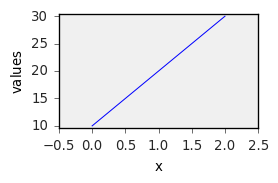

In [8]:
_ = d1D.plot(figsize=(3, 2))

Except few addtional metadata such `author`, `created` ..., there is not much
differences with respect to a conventional `numpy.ndarray`. For example, one
can apply numpy ufunc's directly to a NDDataset or make basic arithmetic
operation with these objects:

In [9]:
np.sqrt(d1D)

name,Dataset N1
author,Blake and Mortimer
created,2021-11-25 22:19:37.048918+00:00
description,A dataset from scratch
history,Ufunc sqrt applied.
DATA,
title,sqrt()
values,[ 3.162 4.472 5.477]
size,3


In [10]:
d1D + d1D / 2.0

name,Dataset N1
author,Blake and Mortimer
created,2021-11-25 22:19:37.048918+00:00
description,A dataset from scratch
history,Binary operation add with `Dataset N1` has been performed
DATA,
title,
values,[ 15 30 45]
size,3


As seen above, there are some metadata that are automatically added to the dataset:

* `id`      : This is a unique identifier for the object
* `author`  : author determined from the computer name if not provided
* `created` : date/time of creation
* `modified`: date/time of modification

additionaly, dataset can have a **`name`** (equal to the `id` if it is not provided)

Some other metadata are defined:

* `history`: history of operation achieved on the object since the object creation
* `description`: A user friendly description of the objects purpose or contents.
* `title`: A title that will be used in plots or in some other operation on the objects.


All this metadata (except, the `id`, `created`, `modified`) can be changed by the user.

For instance:

In [11]:
d1D.title = "intensity"
d1D.name = "mydataset"
d1D.history = "created from scratch"
d1D.description = "Some experimental measurements"
d1D

name,mydataset
author,Blake and Mortimer
created,2021-11-25 22:19:37.048918+00:00
description,Some experimental measurements
history,created from scratch
DATA,
title,intensity
values,[ 10 20 30]
size,3


d1D is a 1D (1-dimensional) dataset with only one dimension.

Some attributes are useful to check this kind of information:

In [12]:
d1D.shape  # the shape of 1D contain only one dimension size

(3,)

In [13]:
d1D.ndim  # the number of dimensions

1

In [14]:
d1D.dims  # the name of the dimension (it has been automatically attributed)

['x']

**Note**: The names of the dimensions are set automatically. But they can be changed, with the limitation that the
name must be a single letter.

In [15]:
d1D.dims = ["q"]  # change the list of dim names.

In [16]:
d1D.dims

['q']

### nD-Dataset (multidimensional dataset)

To create a nD NDDataset, we can provide a nD-array like object to the NDDataset instance constructor

In [17]:
a = np.random.rand(2, 4, 6)
a

array([[[  0.6179,   0.3432, ...,   0.6413,   0.4947],
        [  0.9859,   0.8736, ...,   0.8033,   0.2244],
        [  0.2587,   0.8797, ...,   0.6585,   0.4306],
        [  0.8023,    0.693, ...,   0.7104,   0.1961]],

       [[  0.4684,   0.4811, ...,   0.8004,   0.5451],
        [   0.887,   0.5251, ...,   0.1946,   0.4728],
        [  0.1032,   0.5153, ...,   0.3821,   0.9555],
        [  0.4217,   0.7487, ...,   0.7507,   0.2507]]])

In [18]:
d3D = NDDataset(a)
d3D.title = "energy"
d3D.author = "Someone"
d3D.name = "3D dataset creation"
d3D.history = "created from scratch"
d3D.description = "Some example"
d3D.dims = ["u", "v", "t"]
d3D

name,3D dataset creation
author,Someone
created,2021-11-25 22:19:37.422178+00:00
description,Some example
history,created from scratch
DATA,
title,energy
values,[[[ 0.6179 0.3432 ... 0.6413 0.4947] [ 0.9859 0.8736 ... 0.8033 0.2244] [ 0.2587 0.8797 ... 0.6585 0.4306] [ 0.8023 0.693 ... 0.7104 0.1961]] [[ 0.4684 0.4811 ... 0.8004 0.5451] [ 0.887 0.5251 ... 0.1946 0.4728] [ 0.1032 0.5153 ... 0.3821 0.9555] [ 0.4217 0.7487 ... 0.7507 0.2507]]]
shape,"(u:2, v:4, t:6)"


We can also add all information in a single statement

In [19]:
d3D = NDDataset(
    a,
    dims=["u", "v", "t"],
    title="Energy",
    author="Someone",
    name="3D_dataset",
    history="created from scratch",
    description="a single statement creation example",
)
d3D

name,3D_dataset
author,Someone
created,2021-11-25 22:19:37.435024+00:00
description,a single statement creation example
history,created from scratch
DATA,
title,Energy
values,[[[ 0.6179 0.3432 ... 0.6413 0.4947] [ 0.9859 0.8736 ... 0.8033 0.2244] [ 0.2587 0.8797 ... 0.6585 0.4306] [ 0.8023 0.693 ... 0.7104 0.1961]] [[ 0.4684 0.4811 ... 0.8004 0.5451] [ 0.887 0.5251 ... 0.1946 0.4728] [ 0.1032 0.5153 ... 0.3821 0.9555] [ 0.4217 0.7487 ... 0.7507 0.2507]]]
shape,"(u:2, v:4, t:6)"


Three names are attributed at the creation (if they are not provided with the `dims` attribute, then the name are:
'z','y','x' automatically attributed)

In [20]:
d3D.dims

['u', 'v', 't']

In [21]:
d3D.ndim

3

In [22]:
d3D.shape

(2, 4, 6)

## Units

One interesting possibility for a NDDataset is to have defined units for the internal data.

In [23]:
d1D.units = ur.eV  # ur is a registry containing all available units

In [24]:
d1D  # note the eV symbol of the units added to the values field below

name,mydataset
author,Blake and Mortimer
created,2021-11-25 22:19:37.048918+00:00
description,Some experimental measurements
history,created from scratch
DATA,
title,intensity
values,[ 10 20 30] eV
size,3


This allows to make units-aware calculations:

In [25]:
d1D ** 2  # note the results in eV^2

name,mydataset
author,Blake and Mortimer
created,2021-11-25 22:19:37.048918+00:00
description,Some experimental measurements
history,created from scratch Binary operation pow with `2` has been performed
DATA,
title,intensity
values,[ 100 400 900] eV^2
size,3


In [26]:
np.sqrt(d1D)  # note the result in e^0.5

name,mydataset
author,Blake and Mortimer
created,2021-11-25 22:19:37.048918+00:00
description,Some experimental measurements
history,created from scratch Ufunc sqrt applied.
DATA,
title,sqrt(intensity)
values,[ 3.162 4.472 5.477] eV^0.5
size,3


In [27]:
time = 5.0 * ur.second
d1D / time  # here we get results in eV/s

name,mydataset
author,Blake and Mortimer
created,2021-11-25 22:19:37.048918+00:00
description,Some experimental measurements
history,created from scratch Binary operation truediv with `5.0 second` has been performed
DATA,
title,intensity
values,[ 2 4 6] eV.s^-1
size,3


Conversion can be done between different units transparently

In [28]:
d1D.to("J")

name,mydataset
author,Blake and Mortimer
created,2021-11-25 22:19:37.048918+00:00
description,Some experimental measurements
history,created from scratch
DATA,
title,intensity
values,[1.602e-18 3.204e-18 4.807e-18] J
size,3


In [29]:
d1D.to("K")

name,mydataset
author,Blake and Mortimer
created,2021-11-25 22:19:37.048918+00:00
description,Some experimental measurements
history,created from scratch
DATA,
title,intensity
values,[1.16e+05 2.321e+05 3.481e+05] K
size,3


## Coordinates

The above created `d3D` dataset has 3 dimensions, but no coordinate for these dimensions. Here arises a big difference
with simple `numpy`-arrays:
* We can add coordinates to each dimensions of a NDDataset.

To get the list of all defined coordinates, we can use the `coords` attribute:

In [30]:
d3D.coordset  # no coordinates, so it returns nothing (None)

In [31]:
d3D.t  # the same for coordinate  t, v, u which are not yet set

To add coordinates, on way is to set them one by one:

In [32]:
d3D.t = (
    Coord.arange(6) * 0.1
)  # we need a sequence of 6 values for `t` dimension (see shape above)
d3D.t.title = "time"
d3D.t.units = ur.seconds
d3D.coordset  # now return a list of coordinates

DIMENSION `t`,
size,6
title,time
coordinates,[ 0 0.1 0.2 0.3 0.4 0.5] s


In [33]:
d3D.t

size,6
title,time
coordinates,[ 0 0.1 0.2 0.3 0.4 0.5] s


In [34]:
d3D.coordset("t")  # Alternative way to get a given coordinates

size,6
title,time
coordinates,[ 0 0.1 0.2 0.3 0.4 0.5] s


In [35]:
d3D["t"]  # another alternative way to get a given coordinates

size,6
title,time
coordinates,[ 0 0.1 0.2 0.3 0.4 0.5] s


The two other coordinates u and v are still undefined

In [36]:
d3D.u, d3D.v

(Coord: empty, Coord: empty)

When the dataset is printed, only the information for the existing coordinates is given.

In [37]:
d3D

name,3D_dataset
author,Someone
created,2021-11-25 22:19:37.435024+00:00
description,a single statement creation example
history,created from scratch
DATA,
title,Energy
values,[[[ 0.6179 0.3432 ... 0.6413 0.4947] [ 0.9859 0.8736 ... 0.8033 0.2244] [ 0.2587 0.8797 ... 0.6585 0.4306] [ 0.8023 0.693 ... 0.7104 0.1961]] [[ 0.4684 0.4811 ... 0.8004 0.5451] [ 0.887 0.5251 ... 0.1946 0.4728] [ 0.1032 0.5153 ... 0.3821 0.9555] [ 0.4217 0.7487 ... 0.7507 0.2507]]]
shape,"(u:2, v:4, t:6)"
DIMENSION `t`,
size,6


Programatically, we can use the attribute `is_empty` or `has_data` to check this

In [38]:
d3D.v.has_data, d3D.v.is_empty

(False, True)

An error is raised when a coordinate doesn't exist

In [39]:
try:
    d3D.x
except KeyError as e:
    scp.error_(e)

 ERROR | KeyError: 'Could not find `x` in coordinates names or titles'


In some case it can also be usefull to get a coordinate from its title instead of its name (the limitation is that if
several coordinates have the same title, then only the first ones that is found in the coordinate list, will be
returned - this can be ambiguous)

In [40]:
d3D["time"]

size,6
title,time
coordinates,[ 0 0.1 0.2 0.3 0.4 0.5] s


In [41]:
d3D.time

size,6
title,time
coordinates,[ 0 0.1 0.2 0.3 0.4 0.5] s


## Labels

It is possible to use labels instead of numerical coordinates. They are sequence of objects .The length of the
sequence must be equal to the size of a dimension.

The labels can be simple strings, *e.g.,*

In [42]:
tags = list("ab")
d3D.u.title = "some tags"
d3D.u.labels = tags  # TODO: avoid repetition
d3D

name,3D_dataset
author,Someone
created,2021-11-25 22:19:37.435024+00:00
description,a single statement creation example
history,created from scratch
DATA,
title,Energy
values,[[[ 0.6179 0.3432 ... 0.6413 0.4947] [ 0.9859 0.8736 ... 0.8033 0.2244] [ 0.2587 0.8797 ... 0.6585 0.4306] [ 0.8023 0.693 ... 0.7104 0.1961]] [[ 0.4684 0.4811 ... 0.8004 0.5451] [ 0.887 0.5251 ... 0.1946 0.4728] [ 0.1032 0.5153 ... 0.3821 0.9555] [ 0.4217 0.7487 ... 0.7507 0.2507]]]
shape,"(u:2, v:4, t:6)"
DIMENSION `t`,
size,6


or more complex objects.

For instance here we use datetime.timedelta objets:

In [43]:
from datetime import timedelta

start = timedelta(0)
times = [start + timedelta(seconds=x * 60) for x in range(6)]
d3D.t = None
d3D.t.labels = times
d3D.t.title = "time"
d3D

name,3D_dataset
author,Someone
created,2021-11-25 22:19:37.435024+00:00
description,a single statement creation example
history,created from scratch
DATA,
title,Energy
values,[[[ 0.6179 0.3432 ... 0.6413 0.4947] [ 0.9859 0.8736 ... 0.8033 0.2244] [ 0.2587 0.8797 ... 0.6585 0.4306] [ 0.8023 0.693 ... 0.7104 0.1961]] [[ 0.4684 0.4811 ... 0.8004 0.5451] [ 0.887 0.5251 ... 0.1946 0.4728] [ 0.1032 0.5153 ... 0.3821 0.9555] [ 0.4217 0.7487 ... 0.7507 0.2507]]]
shape,"(u:2, v:4, t:6)"
DIMENSION `t`,
size,6


In this case, getting a coordinate that doesn't possess numerical data but labels, will return the labels

In [44]:
d3D.time

size,6
title,time
labels,[ 0:00:00 0:01:00 0:02:00 0:03:00 0:04:00 0:05:00]


# More insight on coordinates

## Sharing coordinates between dimensions

Sometimes it is not necessary to have different coordinates for the each axes. Some can be shared between axes.

For example, if we have a square matrix with the same coordinate in the two dimensions, the second dimension can
refer to the first. Here we create a square 2D dataset, using the `diag` method:

In [45]:
nd = NDDataset.diag((3, 3, 2.5))
nd

name,NDDataset_c6c62327
author,runner@fv-az213-633
created,2021-11-25 22:19:37.646498+00:00
history,Created using method : diag
DATA,
title,
values,[[ 3 0 0] [ 0 3 0] [ 0 0 2.5]]
shape,"(y:3, x:3)"


and then we add the same coordinate for both dimensions

In [46]:
coordx = Coord.arange(3)
nd.set_coordset(x=coordx, y="x")
nd

name,NDDataset_c6c62327
author,runner@fv-az213-633
created,2021-11-25 22:19:37.646498+00:00
history,Created using method : diag
DATA,
title,
values,[[ 3 0 0] [ 0 3 0] [ 0 0 2.5]]
shape,"(y:3, x:3)"
DIMENSION `x`=`y`,
size,3
title,


## Setting coordinates using `set_coordset`

Lets create 3 `Coord` objects to be use a s coordinates for the 3 dimensions of the previous d3D dataset.

In [47]:
d3D.dims = ["t", "v", "u"]
s0, s1, s2 = d3D.shape
coord0 = Coord.linspace(10.0, 100.0, s0, units="m", title="distance")
coord1 = Coord.linspace(20.0, 25.0, s1, units="K", title="temperature")
coord2 = Coord.linspace(0.0, 1000.0, s2, units="hour", title="elapsed time")

### Syntax 1

In [48]:
d3D.set_coordset(u=coord2, v=coord1, t=coord0)
d3D

name,3D_dataset
author,Someone
created,2021-11-25 22:19:37.435024+00:00
description,a single statement creation example
history,created from scratch
DATA,
title,Energy
values,[[[ 0.6179 0.3432 ... 0.6413 0.4947] [ 0.9859 0.8736 ... 0.8033 0.2244] [ 0.2587 0.8797 ... 0.6585 0.4306] [ 0.8023 0.693 ... 0.7104 0.1961]] [[ 0.4684 0.4811 ... 0.8004 0.5451] [ 0.887 0.5251 ... 0.1946 0.4728] [ 0.1032 0.5153 ... 0.3821 0.9555] [ 0.4217 0.7487 ... 0.7507 0.2507]]]
shape,"(t:2, v:4, u:6)"
DIMENSION `t`,
size,2


### Syntax 2

In [49]:
d3D.set_coordset({"u": coord2, "v": coord1, "t": coord0})
d3D

name,3D_dataset
author,Someone
created,2021-11-25 22:19:37.435024+00:00
description,a single statement creation example
history,created from scratch
DATA,
title,Energy
values,[[[ 0.6179 0.3432 ... 0.6413 0.4947] [ 0.9859 0.8736 ... 0.8033 0.2244] [ 0.2587 0.8797 ... 0.6585 0.4306] [ 0.8023 0.693 ... 0.7104 0.1961]] [[ 0.4684 0.4811 ... 0.8004 0.5451] [ 0.887 0.5251 ... 0.1946 0.4728] [ 0.1032 0.5153 ... 0.3821 0.9555] [ 0.4217 0.7487 ... 0.7507 0.2507]]]
shape,"(t:2, v:4, u:6)"
DIMENSION `t`,
size,2


## Adding several coordinates to a single dimension
We can add several coordinates to the same dimension

In [50]:
coord1b = Coord([1, 2, 3, 4], units="millitesla", title="magnetic field")

In [51]:
d3D.set_coordset(u=coord2, v=[coord1, coord1b], t=coord0)
d3D

name,3D_dataset
author,Someone
created,2021-11-25 22:19:37.435024+00:00
description,a single statement creation example
history,created from scratch
DATA,
title,Energy
values,[[[ 0.6179 0.3432 ... 0.6413 0.4947] [ 0.9859 0.8736 ... 0.8033 0.2244] [ 0.2587 0.8797 ... 0.6585 0.4306] [ 0.8023 0.693 ... 0.7104 0.1961]] [[ 0.4684 0.4811 ... 0.8004 0.5451] [ 0.887 0.5251 ... 0.1946 0.4728] [ 0.1032 0.5153 ... 0.3821 0.9555] [ 0.4217 0.7487 ... 0.7507 0.2507]]]
shape,"(t:2, v:4, u:6)"
DIMENSION `t`,
size,2


We can retrieve the various coordinates for a single dimention easily:

In [52]:
d3D.v_1

size,4
title,temperature
coordinates,[ 20 21.67 23.33 25] K


## Summary of the coordinate setting syntax
Some additional information about coordinate setting syntax

**A.** First syntax (probably the safer because the name of the dimension is specified, so this is less prone to
errors!)

In [53]:
d3D.set_coordset(u=coord2, v=[coord1, coord1b], t=coord0)
# or equivalent
d3D.set_coordset(u=coord2, v=CoordSet(coord1, coord1b), t=coord0)
d3D

name,3D_dataset
author,Someone
created,2021-11-25 22:19:37.435024+00:00
description,a single statement creation example
history,created from scratch
DATA,
title,Energy
values,[[[ 0.6179 0.3432 ... 0.6413 0.4947] [ 0.9859 0.8736 ... 0.8033 0.2244] [ 0.2587 0.8797 ... 0.6585 0.4306] [ 0.8023 0.693 ... 0.7104 0.1961]] [[ 0.4684 0.4811 ... 0.8004 0.5451] [ 0.887 0.5251 ... 0.1946 0.4728] [ 0.1032 0.5153 ... 0.3821 0.9555] [ 0.4217 0.7487 ... 0.7507 0.2507]]]
shape,"(t:2, v:4, u:6)"
DIMENSION `t`,
size,2


**B.** Second syntax assuming the coordinates are given in the order of the dimensions.

Remember that we can check this order using the `dims` attribute of a NDDataset

In [54]:
d3D.dims

['t', 'v', 'u']

In [55]:
d3D.set_coordset((coord0, [coord1, coord1b], coord2))
# or equivalent
d3D.set_coordset(coord0, CoordSet(coord1, coord1b), coord2)
d3D

name,3D_dataset
author,Someone
created,2021-11-25 22:19:37.435024+00:00
description,a single statement creation example
history,created from scratch
DATA,
title,Energy
values,[[[ 0.6179 0.3432 ... 0.6413 0.4947] [ 0.9859 0.8736 ... 0.8033 0.2244] [ 0.2587 0.8797 ... 0.6585 0.4306] [ 0.8023 0.693 ... 0.7104 0.1961]] [[ 0.4684 0.4811 ... 0.8004 0.5451] [ 0.887 0.5251 ... 0.1946 0.4728] [ 0.1032 0.5153 ... 0.3821 0.9555] [ 0.4217 0.7487 ... 0.7507 0.2507]]]
shape,"(t:2, v:4, u:6)"
DIMENSION `t`,
size,2


**C.** Third syntax (from a dictionary)

In [56]:
d3D.set_coordset({"t": coord0, "u": coord2, "v": [coord1, coord1b]})
d3D

name,3D_dataset
author,Someone
created,2021-11-25 22:19:37.435024+00:00
description,a single statement creation example
history,created from scratch
DATA,
title,Energy
values,[[[ 0.6179 0.3432 ... 0.6413 0.4947] [ 0.9859 0.8736 ... 0.8033 0.2244] [ 0.2587 0.8797 ... 0.6585 0.4306] [ 0.8023 0.693 ... 0.7104 0.1961]] [[ 0.4684 0.4811 ... 0.8004 0.5451] [ 0.887 0.5251 ... 0.1946 0.4728] [ 0.1032 0.5153 ... 0.3821 0.9555] [ 0.4217 0.7487 ... 0.7507 0.2507]]]
shape,"(t:2, v:4, u:6)"
DIMENSION `t`,
size,2


**D.** It is also possible to use directly the `coordset` property

In [57]:
d3D.coordset = coord0, [coord1, coord1b], coord2
d3D

name,3D_dataset
author,Someone
created,2021-11-25 22:19:37.435024+00:00
description,a single statement creation example
history,created from scratch
DATA,
title,Energy
values,[[[ 0.6179 0.3432 ... 0.6413 0.4947] [ 0.9859 0.8736 ... 0.8033 0.2244] [ 0.2587 0.8797 ... 0.6585 0.4306] [ 0.8023 0.693 ... 0.7104 0.1961]] [[ 0.4684 0.4811 ... 0.8004 0.5451] [ 0.887 0.5251 ... 0.1946 0.4728] [ 0.1032 0.5153 ... 0.3821 0.9555] [ 0.4217 0.7487 ... 0.7507 0.2507]]]
shape,"(t:2, v:4, u:6)"
DIMENSION `t`,
size,2


In [58]:
d3D.coordset = {"t": coord0, "u": coord2, "v": [coord1, coord1b]}
d3D

name,3D_dataset
author,Someone
created,2021-11-25 22:19:37.435024+00:00
description,a single statement creation example
history,created from scratch
DATA,
title,Energy
values,[[[ 0.6179 0.3432 ... 0.6413 0.4947] [ 0.9859 0.8736 ... 0.8033 0.2244] [ 0.2587 0.8797 ... 0.6585 0.4306] [ 0.8023 0.693 ... 0.7104 0.1961]] [[ 0.4684 0.4811 ... 0.8004 0.5451] [ 0.887 0.5251 ... 0.1946 0.4728] [ 0.1032 0.5153 ... 0.3821 0.9555] [ 0.4217 0.7487 ... 0.7507 0.2507]]]
shape,"(t:2, v:4, u:6)"
DIMENSION `t`,
size,2


In [59]:
d3D.coordset = CoordSet(t=coord0, u=coord2, v=[coord1, coord1b])
d3D

name,3D_dataset
author,Someone
created,2021-11-25 22:19:37.435024+00:00
description,a single statement creation example
history,created from scratch
DATA,
title,Energy
values,[[[ 0.6179 0.3432 ... 0.6413 0.4947] [ 0.9859 0.8736 ... 0.8033 0.2244] [ 0.2587 0.8797 ... 0.6585 0.4306] [ 0.8023 0.693 ... 0.7104 0.1961]] [[ 0.4684 0.4811 ... 0.8004 0.5451] [ 0.887 0.5251 ... 0.1946 0.4728] [ 0.1032 0.5153 ... 0.3821 0.9555] [ 0.4217 0.7487 ... 0.7507 0.2507]]]
shape,"(t:2, v:4, u:6)"
DIMENSION `t`,
size,2


<div class='alert alert-warning'>
<b>WARNING</b>

Do not use list for setting multiples coordinates! use tuples
</div>

This raise an error (list have another signification: it's used to set a "same dim" CoordSet see example A or B)

In [60]:
try:
    d3D.coordset = [coord0, coord1, coord2]
except ValueError:
    scp.error_(
        "Coordinates must be of the same size for a dimension with multiple coordinates"
    )

 ERROR | Coordinates must be of the same size for a dimension with multiple coordinates


This works : it use a tuple `()`, not a list `[]`

In [61]:
d3D.coordset = (
    coord0,
    coord1,
    coord2,
)  # equivalent to d3D.coordset = coord0, coord1, coord2
d3D

name,3D_dataset
author,Someone
created,2021-11-25 22:19:37.435024+00:00
description,a single statement creation example
history,created from scratch
DATA,
title,Energy
values,[[[ 0.6179 0.3432 ... 0.6413 0.4947] [ 0.9859 0.8736 ... 0.8033 0.2244] [ 0.2587 0.8797 ... 0.6585 0.4306] [ 0.8023 0.693 ... 0.7104 0.1961]] [[ 0.4684 0.4811 ... 0.8004 0.5451] [ 0.887 0.5251 ... 0.1946 0.4728] [ 0.1032 0.5153 ... 0.3821 0.9555] [ 0.4217 0.7487 ... 0.7507 0.2507]]]
shape,"(t:2, v:4, u:6)"
DIMENSION `t`,
size,2


**E.** Setting the coordinates individually

Either a single coordinate

In [62]:
d3D.u = coord2
d3D

name,3D_dataset
author,Someone
created,2021-11-25 22:19:37.435024+00:00
description,a single statement creation example
history,created from scratch
DATA,
title,Energy
values,[[[ 0.6179 0.3432 ... 0.6413 0.4947] [ 0.9859 0.8736 ... 0.8033 0.2244] [ 0.2587 0.8797 ... 0.6585 0.4306] [ 0.8023 0.693 ... 0.7104 0.1961]] [[ 0.4684 0.4811 ... 0.8004 0.5451] [ 0.887 0.5251 ... 0.1946 0.4728] [ 0.1032 0.5153 ... 0.3821 0.9555] [ 0.4217 0.7487 ... 0.7507 0.2507]]]
shape,"(t:2, v:4, u:6)"
DIMENSION `t`,
size,2


or multiple coordinates for a single dimension

In [63]:
d3D.v = [coord1, coord1b]
d3D

name,3D_dataset
author,Someone
created,2021-11-25 22:19:37.435024+00:00
description,a single statement creation example
history,created from scratch
DATA,
title,Energy
values,[[[ 0.6179 0.3432 ... 0.6413 0.4947] [ 0.9859 0.8736 ... 0.8033 0.2244] [ 0.2587 0.8797 ... 0.6585 0.4306] [ 0.8023 0.693 ... 0.7104 0.1961]] [[ 0.4684 0.4811 ... 0.8004 0.5451] [ 0.887 0.5251 ... 0.1946 0.4728] [ 0.1032 0.5153 ... 0.3821 0.9555] [ 0.4217 0.7487 ... 0.7507 0.2507]]]
shape,"(t:2, v:4, u:6)"
DIMENSION `t`,
size,2


or using a CoorSet object.

In [64]:
d3D.v = CoordSet(coord1, coord1b)
d3D

name,3D_dataset
author,Someone
created,2021-11-25 22:19:37.435024+00:00
description,a single statement creation example
history,created from scratch
DATA,
title,Energy
values,[[[ 0.6179 0.3432 ... 0.6413 0.4947] [ 0.9859 0.8736 ... 0.8033 0.2244] [ 0.2587 0.8797 ... 0.6585 0.4306] [ 0.8023 0.693 ... 0.7104 0.1961]] [[ 0.4684 0.4811 ... 0.8004 0.5451] [ 0.887 0.5251 ... 0.1946 0.4728] [ 0.1032 0.5153 ... 0.3821 0.9555] [ 0.4217 0.7487 ... 0.7507 0.2507]]]
shape,"(t:2, v:4, u:6)"
DIMENSION `t`,
size,2


# Methods to create NDDataset

There are many ways to create `NDDataset` objects.

Let's first create 2 coordinate objects, for which we can define `labels` and `units`! Note the use of the function
`linspace`to generate the data.

In [65]:
c0 = Coord.linspace(
    start=4000.0, stop=1000.0, num=5, labels=None, units="cm^-1", title="wavenumber"
)

In [66]:
c1 = Coord.linspace(
    10.0, 40.0, 3, labels=["Cold", "RT", "Hot"], units="K", title="temperature"
)

The full coordset will be the following

In [67]:
cs = CoordSet(c0, c1)
cs

DIMENSION `x`,
size,3
title,temperature
coordinates,[ 10 25 40] K
labels,[ Cold RT Hot]
DIMENSION `y`,
size,5
title,wavenumber
coordinates,[ 4000 3250 2500 1750 1000] cm^-1


Now we will generate the full dataset, using a ``fromfunction`` method. All needed information are passed as
parameter of the NDDataset instance constructor.

## Create a dataset from a function

In [68]:
def func(x, y, extra):
    return x * y / extra

In [69]:
ds = NDDataset.fromfunction(
    func,
    extra=100 * ur.cm ** -1,  # extra arguments passed to the function
    coordset=cs,
    name="mydataset",
    title="absorbance",
    units=None,
)  # when None, units will be determined from the function results

ds.description = """Dataset example created for this tutorial.
It's a 2-D dataset"""

ds.author = "Blake & Mortimer"
ds

name,mydataset
author,Blake & Mortimer
created,2021-11-25 22:19:37.928234+00:00
description,Dataset example created for this tutorial. It's a 2-D dataset
history,Created using method : fromfunction
DATA,
title,absorbance
values,[[ 400 1000 1600] [ 325 812.5 1300] ... [ 175 437.5 700] [ 100 250 400]] K
shape,"(y:5, x:3)"
DIMENSION `x`,
size,3


## Using numpy-like constructors of NDDatasets

In [70]:
dz = NDDataset.zeros(
    (5, 3), coordset=cs, units="meters", title="Datasets with only zeros"
)

In [71]:
do = NDDataset.ones(
    (5, 3), coordset=cs, units="kilograms", title="Datasets with only ones"
)

In [72]:
df = NDDataset.full(
    (5, 3), fill_value=1.25, coordset=cs, units="radians", title="with only float=1.25"
)
df

name,NDDataset_c6f6a074
author,runner@fv-az213-633
created,2021-11-25 22:19:37.964412+00:00
history,Created using method : full
DATA,
title,with only float=1.25
values,[[ 1.25 1.25 1.25] [ 1.25 1.25 1.25] ... [ 1.25 1.25 1.25] [ 1.25 1.25 1.25]] rad
shape,"(y:5, x:3)"
DIMENSION `x`,
size,3
title,temperature


As with numpy, it is also possible to take another dataset as a template:

In [73]:
df = NDDataset.full_like(d3D, dtype="int", fill_value=2)
df

name,3D_dataset
author,runner@fv-az213-633
created,2021-11-25 22:19:37.435024+00:00
history,created from scratch Copied from object:3D_dataset Created using method : full_like
DATA,
title,Energy
values,[[[ 2 2 ... 2 2] [ 2 2 ... 2 2] [ 2 2 ... 2 2] [ 2 2 ... 2 2]] [[ 2 2 ... 2 2] [ 2 2 ... 2 2] [ 2 2 ... 2 2] [ 2 2 ... 2 2]]]
shape,"(t:2, v:4, u:6)"
DIMENSION `t`,
size,2
title,distance


In [74]:
nd = NDDataset.diag((3, 3, 2.5))
nd

name,NDDataset_c6fd12e1
author,runner@fv-az213-633
created,2021-11-25 22:19:38.006383+00:00
history,Created using method : diag
DATA,
title,
values,[[ 3 0 0] [ 0 3 0] [ 0 0 2.5]]
shape,"(y:3, x:3)"


## Copying existing NDDataset

To copy an existing dataset, this is as simple as:

In [75]:
d3D_copy = d3D.copy()

or alternatively:

In [76]:
d3D_copy = d3D[:]

Finally, it is also possible to initialize a dataset using an existing one:

In [77]:
d3Dduplicate = NDDataset(d3D, name="duplicate of %s" % d3D.name, units="absorbance")
d3Dduplicate

name,duplicate of 3D_dataset
author,runner@fv-az213-633
created,2021-11-25 22:19:37.435024+00:00
history,created from scratch Copied from object:3D_dataset
DATA,
title,Energy
values,[[[ 0.6179 0.3432 ... 0.6413 0.4947] [ 0.9859 0.8736 ... 0.8033 0.2244] [ 0.2587 0.8797 ... 0.6585 0.4306] [ 0.8023 0.693 ... 0.7104 0.1961]] [[ 0.4684 0.4811 ... 0.8004 0.5451] [ 0.887 0.5251 ... 0.1946 0.4728] [ 0.1032 0.5153 ... 0.3821 0.9555] [ 0.4217 0.7487 ... 0.7507 0.2507]]] a.u.
shape,"(t:2, v:4, u:6)"
DIMENSION `t`,
size,2
title,distance


## Importing from external dataset

NDDataset can be created from the importation of external data

A **test**'s data folder contains some data for experimenting some features of datasets.

In [78]:
# let check if this directory exists and display its actual content:
datadir = scp.preferences.datadir
if datadir.exists():
    print(datadir.name)

testdata


Let's load grouped IR spectra acquired using OMNIC:

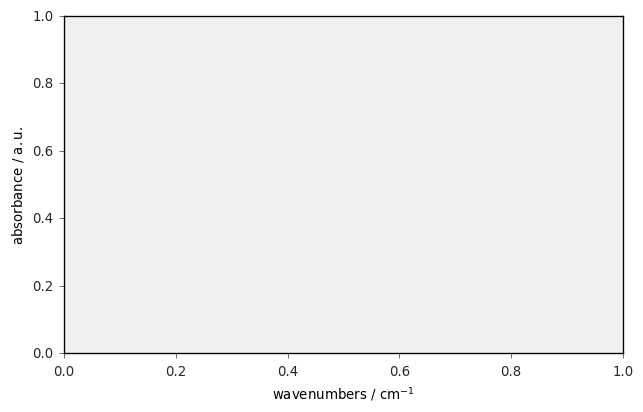

In [79]:
nd = NDDataset.read_omnic(datadir / "irdata/nh4y-activation.spg")
nd.preferences.reset()
_ = nd.plot()

Even if we do not specify the **datadir**, the application first look in tht directory by default.

Now, lets load a NMR dataset (in the Bruker format).

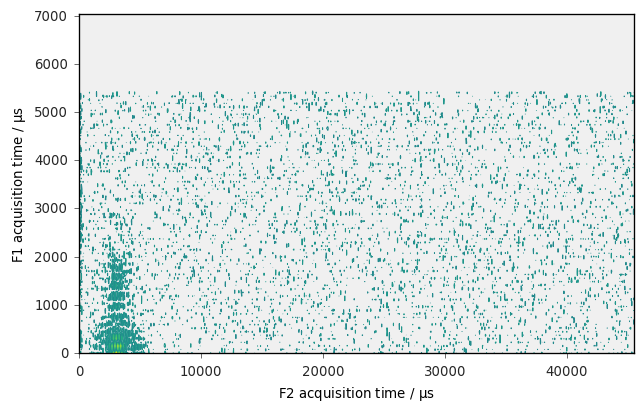

In [80]:
path = datadir / "nmrdata" / "bruker" / "tests" / "nmr" / "topspin_2d"

# load the data directly (no need to create the dataset first)
nd2 = NDDataset.read_topspin(path, expno=1, remove_digital_filter=True)

# view it...
nd2.x.to("s")
nd2.y.to("ms")

ax = nd2.plot(method="map")